<a href="https://colab.research.google.com/github/madina1211/software-packs-project-phising-website/blob/main/Software_packs_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
columns = df.columns
columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [9]:
df = df.drop(["index"], axis=1)

In [11]:
for col in df.columns:
    unique_value_list = df[col].unique()
    print(f'{col} contains:\t{unique_value_list}')

having_IPhaving_IP_Address contains:	[-1  1]
URLURL_Length contains:	[ 1  0 -1]
Shortining_Service contains:	[ 1 -1]
having_At_Symbol contains:	[ 1 -1]
double_slash_redirecting contains:	[-1  1]
Prefix_Suffix contains:	[-1  1]
having_Sub_Domain contains:	[-1  0  1]
SSLfinal_State contains:	[-1  1  0]
Domain_registeration_length contains:	[-1  1]
Favicon contains:	[ 1 -1]
port contains:	[ 1 -1]
HTTPS_token contains:	[-1  1]
Request_URL contains:	[ 1 -1]
URL_of_Anchor contains:	[-1  0  1]
Links_in_tags contains:	[ 1 -1  0]
SFH contains:	[-1  1  0]
Submitting_to_email contains:	[-1  1]
Abnormal_URL contains:	[-1  1]
Redirect contains:	[0 1]
on_mouseover contains:	[ 1 -1]
RightClick contains:	[ 1 -1]
popUpWidnow contains:	[ 1 -1]
Iframe contains:	[ 1 -1]
age_of_domain contains:	[-1  1]
DNSRecord contains:	[-1  1]
web_traffic contains:	[-1  0  1]
Page_Rank contains:	[-1  1]
Google_Index contains:	[ 1 -1]
Links_pointing_to_page contains:	[ 1  0 -1]
Statistical_report contains:	[-1  1]
Result

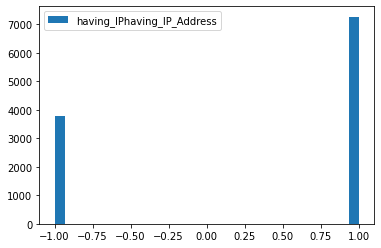

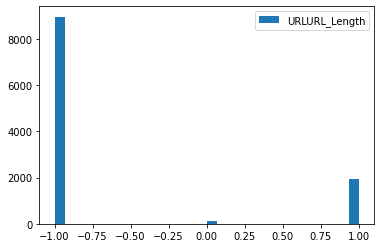

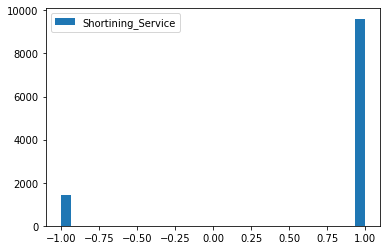

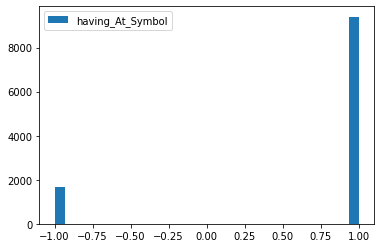

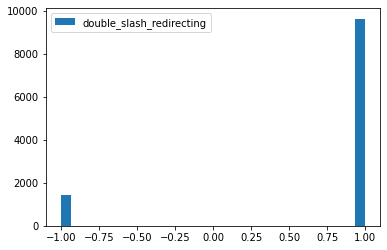

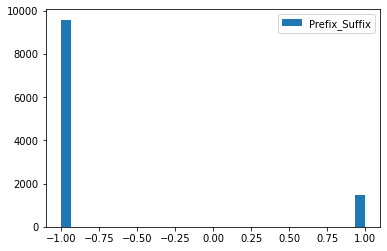

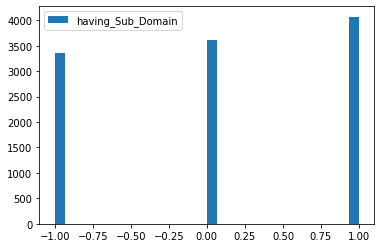

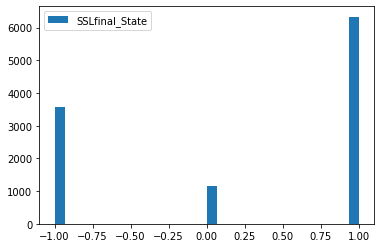

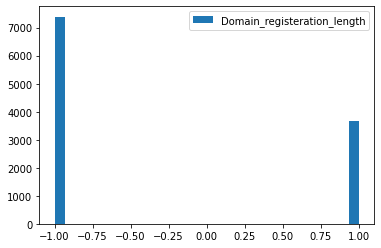

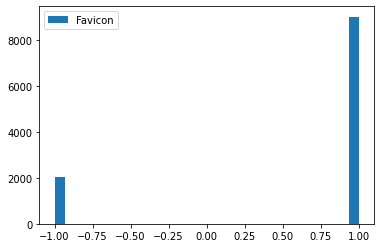

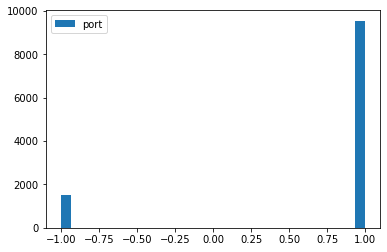

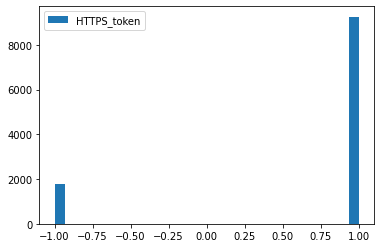

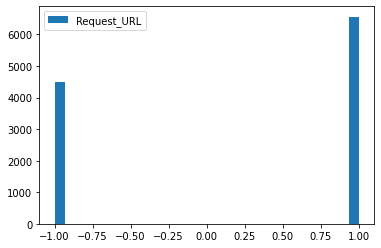

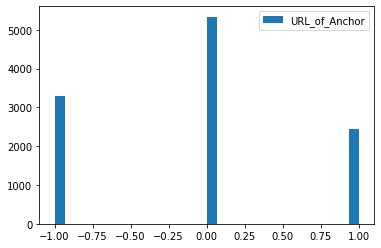

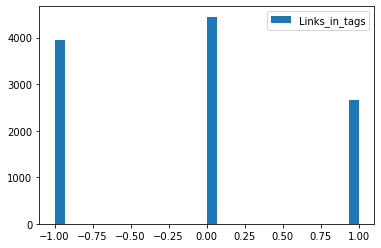

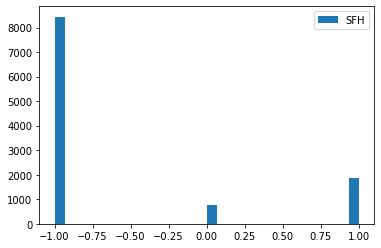

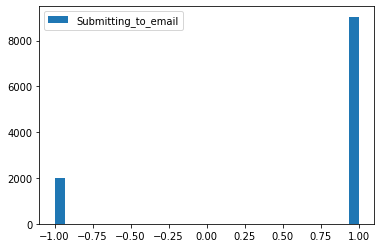

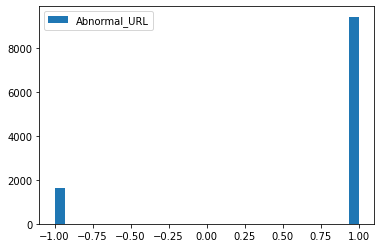

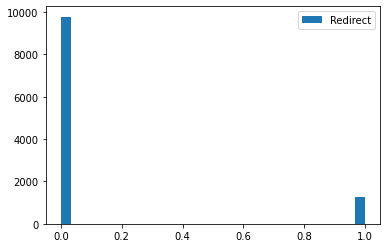

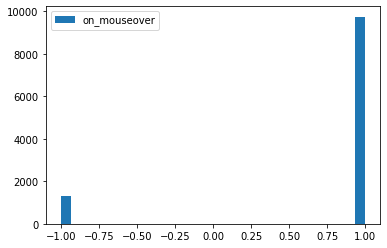

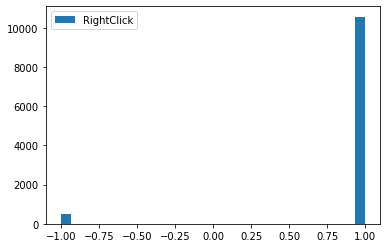

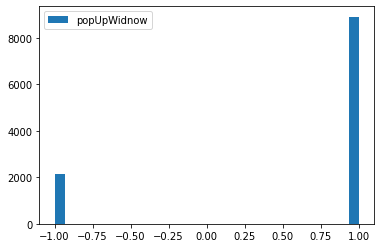

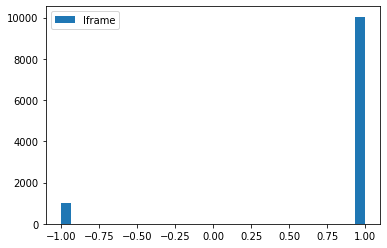

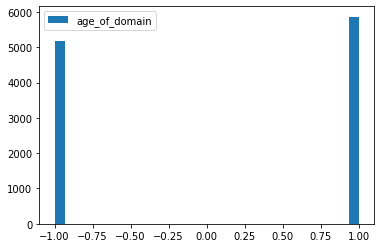

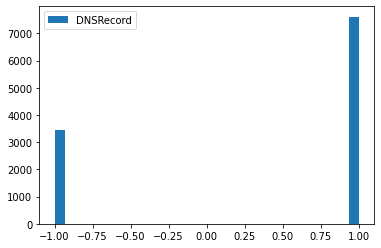

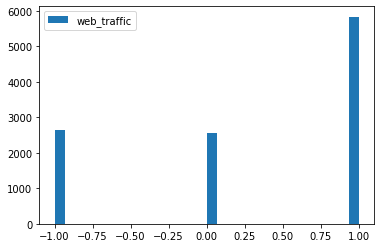

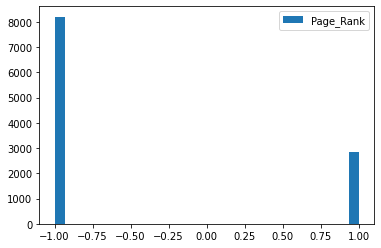

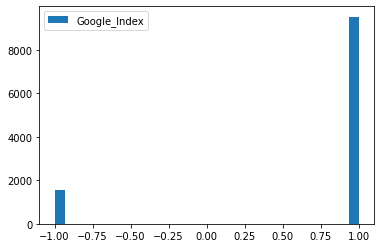

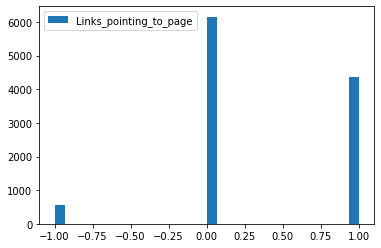

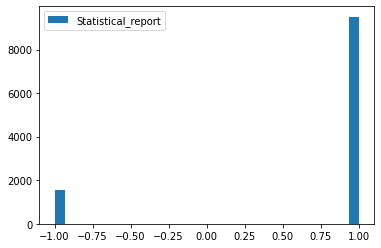

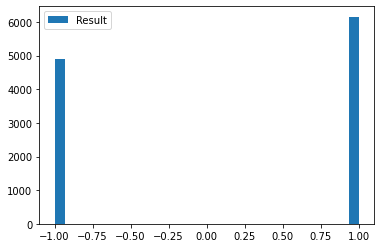

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data_hist(df, columns):
  for column in columns:
    if df[column].dtype != object:
      X = np.array(df[column].values)
      _ = plt.figure()
      plt.hist(X, bins = 30)
      plt.legend([column])
      plt.show()

columns = df.columns
plot_data_hist(df, columns)